Import Libraries

In [27]:
import pandas as pd
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.nn.functional as F
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import torch
import time
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import joblib
from sklearn.metrics import roc_curve, auc
import imblearn
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,f1_score,recall_score, precision_score
import joblib

In [15]:
#Load pre-processed data
x_train = pd.read_csv('x_train.csv')
y_train = pd.read_csv('y_train.csv')
x_test = pd.read_csv('x_test.csv')
y_test = pd.read_csv('y_test.csv')

In [16]:
#Balancing the data
#X_resampled, y_resampled = SMOTE().fit_resample(x_train, x_train)



In [17]:
# print(f'before balacing : {y_train.value_counts()}')
# print(f'after balacing: {y_over.value_counts()}')

In [18]:
#Converted to numpy array
# x_train_over = np.array(x_over)
# x_test = np.array(x_test)
# y_train_over = np.array(y_over).ravel()
# y_test = np.array(y_test).ravel()

In [19]:
#Converted to numpy array
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train).ravel()
y_test = np.array(y_test).ravel()

In [20]:
#checking logrithmic values of C
x = np.power(2, np.arange(-3, 4, dtype=float))
x
            

array([0.125, 0.25 , 0.5  , 1.   , 2.   , 4.   , 8.   ])

In [8]:
#loose coarse grid best hyperparameters obtained : c = 8, gamma = 0.25, kernel = rbf, 
# param_grid = {
#     'C': np.power(2, np.arange(-3, 4, dtype=float)),
#     'kernel': ['rbf', 'poly', 'linear'],
#     'gamma': np.power(2, np.arange(-5, -1, dtype=float)),
#     'degree': [2, 3, 4]  
# }

In [9]:
y = np.power(2, np.arange( 2.50,3.75, 0.25))
y # c values fine grid 

array([ 5.65685425,  6.72717132,  8.        ,  9.51365692, 11.3137085 ])

In [10]:
x =np.power(2, np.arange( -2.50,-1.25, 0.25))
x #gamma fine grid

array([0.1767767 , 0.2102241 , 0.25      , 0.29730178, 0.35355339])

In [11]:
#finding fine grid (where c and gamma are two values before and after the values obtained from loose coarse,
#with a difference of 0.25), kernel best acheived was rbf

param_grid = {
    'C': np.power(2, np.arange( 2.50,3.75, 0.25)),
    'kernel': ['rbf'],
    'gamma': np.power(2, np.arange( -2.50,-1.25, 0.25))
}

In [12]:
# Create the grid search object
grid_search = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,  # Use all available cores for parallel execution
    verbose=2   
)

In [21]:
grid_search.fit(x_train, y_train)

In [343]:
grid_search.best_params_ #best parameters from grid search

{'C': 8.0, 'degree': 2, 'gamma': 0.25, 'kernel': 'rbf'}

In [341]:
grid_results= pd.DataFrame(grid_search.cv_results_) #checking results obtained from fine grid to compare from hyperparameters obtained from loose grid

In [342]:
grid_results[results['param_C']==8] #we got same c value on fine grid which we got in loose grid i.e, 8

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
216,8.888723,0.413174,3.507983,0.180813,8.0,2,0.03125,rbf,"{'C': 8.0, 'degree': 2, 'gamma': 0.03125, 'ker...",0.854320,0.841905,0.841612,0.850482,0.844906,0.846645,0.004989,43
217,10.636368,0.409517,1.707473,0.135387,8.0,2,0.03125,poly,"{'C': 8.0, 'degree': 2, 'gamma': 0.03125, 'ker...",0.791994,0.794781,0.784592,0.789660,0.785606,0.789327,0.003827,117
218,29.603561,0.645350,1.510428,0.058039,8.0,2,0.03125,linear,"{'C': 8.0, 'degree': 2, 'gamma': 0.03125, 'ker...",0.776793,0.770459,0.776989,0.768373,0.768373,0.772197,0.003908,129
219,9.626661,0.580364,3.346904,0.180686,8.0,2,0.0625,rbf,"{'C': 8.0, 'degree': 2, 'gamma': 0.0625, 'kern...",0.860147,0.847226,0.851242,0.857577,0.850228,0.853284,0.004811,22
220,10.636470,0.600968,1.510215,0.061294,8.0,2,0.0625,poly,"{'C': 8.0, 'degree': 2, 'gamma': 0.0625, 'kern...",0.804155,0.804408,0.794729,0.804105,0.795743,0.800628,0.004416,106
221,30.456540,0.872383,1.436082,0.071651,8.0,2,0.0625,linear,"{'C': 8.0, 'degree': 2, 'gamma': 0.0625, 'kern...",0.776793,0.770459,0.776989,0.768373,0.768373,0.772197,0.003908,129
222,9.851298,0.530278,3.190327,0.153678,8.0,2,0.125,rbf,"{'C': 8.0, 'degree': 2, 'gamma': 0.125, 'kerne...",0.864961,0.856600,0.859351,0.859351,0.853776,0.858808,0.003705,7
223,12.374165,0.432744,1.375570,0.038222,8.0,2,0.125,poly,"{'C': 8.0, 'degree': 2, 'gamma': 0.125, 'kerne...",0.807702,0.808715,0.799037,0.805626,0.801571,0.804530,0.003680,98
224,29.195573,1.496349,1.423312,0.116795,8.0,2,0.125,linear,"{'C': 8.0, 'degree': 2, 'gamma': 0.125, 'kerne...",0.776793,0.770459,0.776989,0.768373,0.768373,0.772197,0.003908,129
225,10.283187,0.435063,3.039208,0.054638,8.0,2,0.25,rbf,"{'C': 8.0, 'degree': 2, 'gamma': 0.25, 'kernel...",0.867494,0.863947,0.865180,0.872276,0.865433,0.866866,0.002935,1


In [ ]:
grid_search.best_score_

In [22]:
# model = SVC(C=8,probability=True, degree =2) 
svc_model = SVC(C=8,probability=True, gamma =0.25, kernel = 'rbf') #best params
# model = SVC(C=0.8, kernel = 'linear')

In [24]:
start_time = time.time() #comparing time to train the model
svc_model.fit(x_train, y_train)
end_time = time.time()
elapsed_time = end_time- start_time
print(f"Training completed in {elapsed_time // 60:.0f}m {elapsed_time % 60:.0f}s")

Training completed in 0m 20s


In [323]:
# model.score(x_test, y_test)
svc_model.score(x_test, y_test) #test scores

0.8780745834435335

In [325]:
from sklearn.metrics import RocCurveDisplay

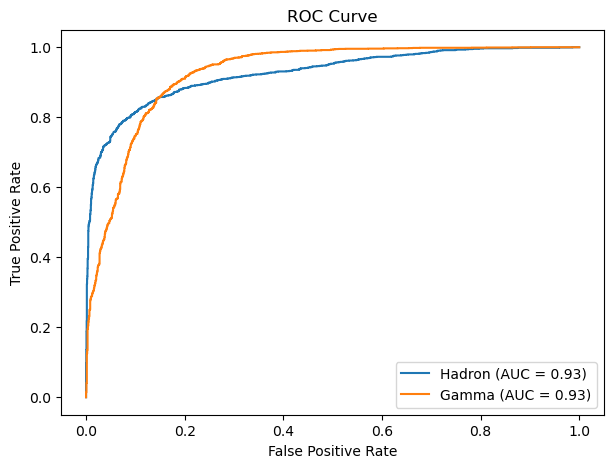

In [327]:


y_prob = svc_model.predict_proba(x_test) # Predict probabilities for both class(gamma and hadron)


fpr_class0, tpr_class0, _ = roc_curve(y_test, y_prob[:, 0], pos_label=0) # Compute FPR and TPR for creating ROC curve
fpr_class1, tpr_class1, _ = roc_curve(y_test, y_prob[:, 1], pos_label=1)
#0 for Hadron and 1 for gamma

roc_auc_class0 = auc(fpr_class0, tpr_class0) # Calculate AUC values for both class
roc_auc_class1 = auc(fpr_class1, tpr_class1)


plt.figure(figsize=(7, 5)) #plot ROC curve for both class

# Plot ROC curve for Hadron (class 0)
plt.plot(fpr_class0, tpr_class0, label=f'Hadron (AUC = {roc_auc_class0:.2f})')

# Plot ROC curve for Gamma (class 1) 
plt.plot(fpr_class1, tpr_class1, label=f'Gamma (AUC = {roc_auc_class1:.2f})')


plt.xlabel('False Positive Rate') #set labels
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend() #legends described in label above


plt.show()


In [328]:
 
cm_svm = confusion_matrix(y_test, svc_model.predict(x_test)) #create confusion matrix

In [329]:
y_pred = svc_model.predict(x_test)

Text(0.5, 23.52222222222222, 'Predicted Values')

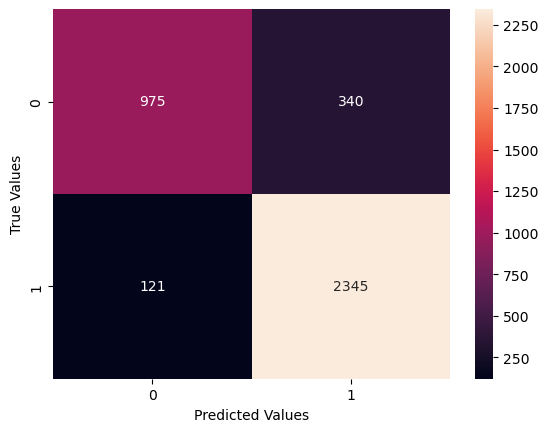

In [330]:
sns.heatmap(cm_svm, annot = True,fmt='d') # Plot confusion matrix using heatmap
plt.ylabel('True Values')
plt.xlabel('Predicted Values')

In [333]:
#performance metrics 
accuracy = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
precision_score =  precision_score(y_test, y_pred)
recall_score = recall_score(y_test, y_pred)

In [334]:
print(f'Accuracy: {accuracy}, F1_score: {f1_score},precision_score: {precision_score},recall_score: {recall_score}')

Accuracy: 0.8780745834435335, F1_score: 0.9105028149873812,precision_score: 0.8733705772811918,recall_score: 0.9509326845093269


In [337]:
#Save best model
#joblib.dump(svc_model, 'SVM_best_model')

['SVM_best_model']